In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
file_path ='resources/strikers.csv'
strikers_df = pd.read_csv(file_path)
strikers_df['rating'] = (strikers_df['potential']+strikers_df['overall'])/2



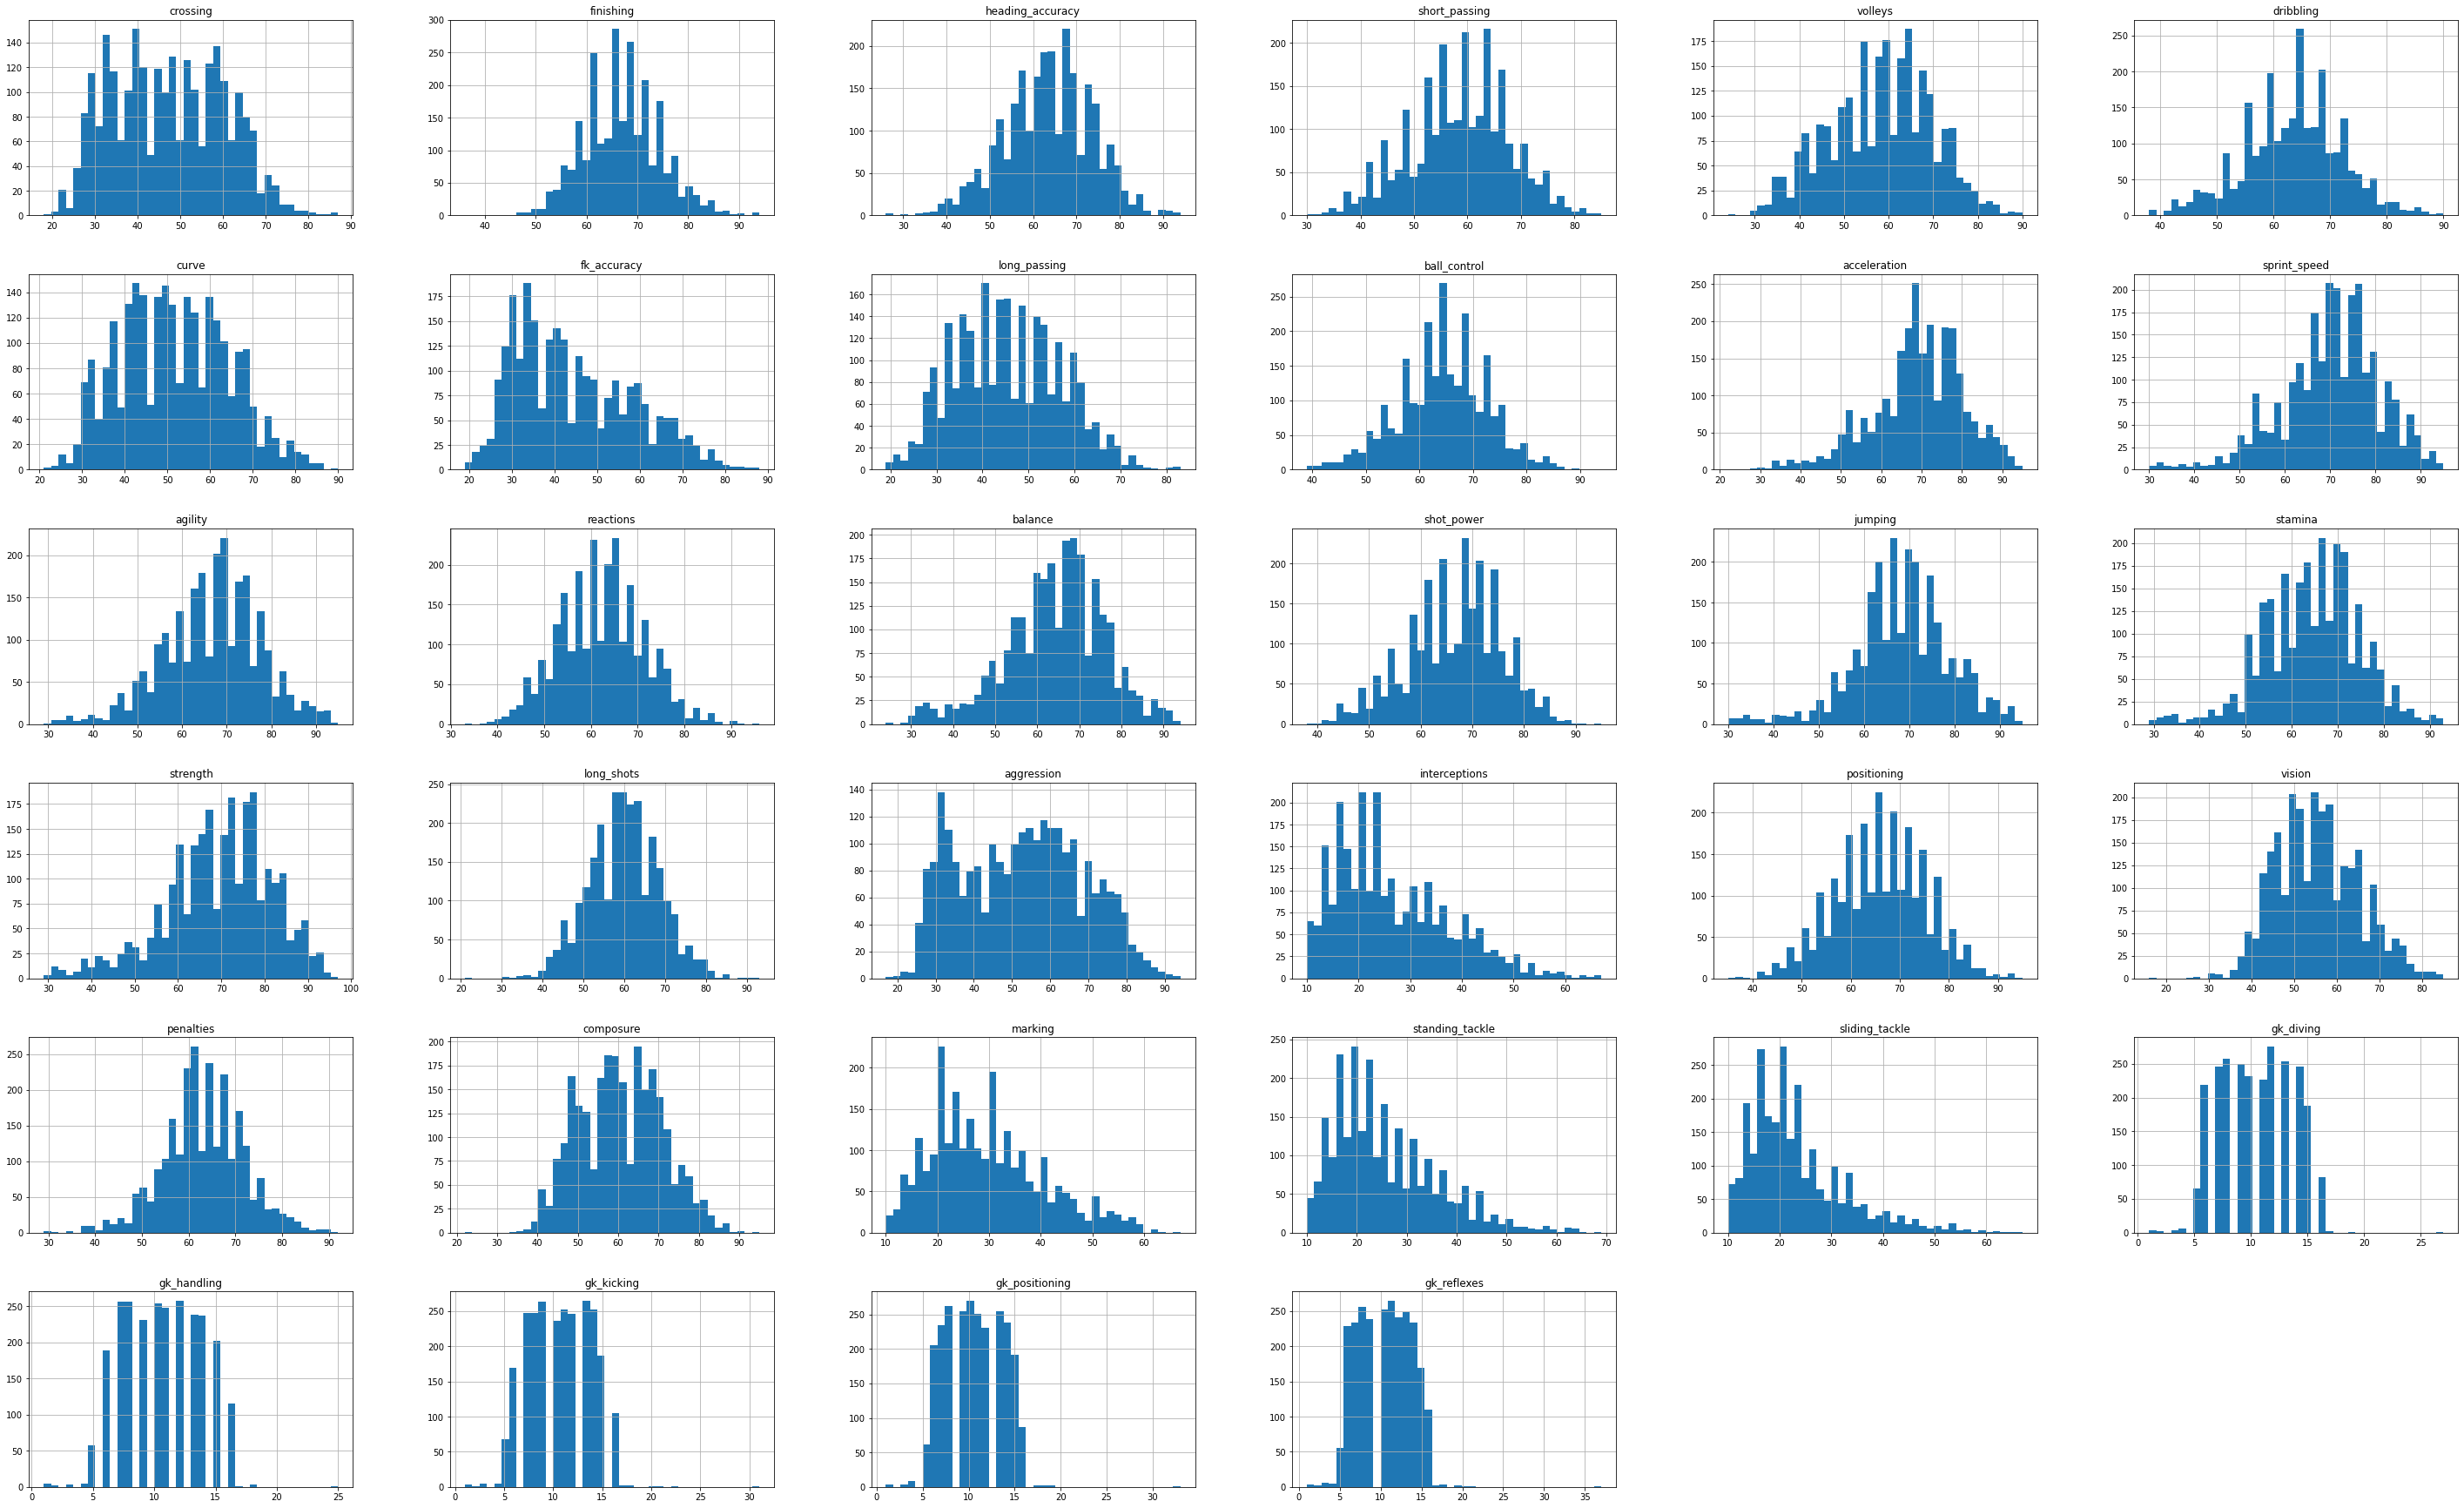

In [3]:
strikers_df.drop(['rating', 'weight', 'overall', 'potential'], axis = 1).hist(bins=40, figsize=(50,31))
plt.show()

In [4]:
strikers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           2562 non-null   int64  
 1   potential         2562 non-null   int64  
 2   field_position    2562 non-null   object 
 3   height            2562 non-null   object 
 4   weight            2562 non-null   object 
 5   crossing          2562 non-null   int64  
 6   finishing         2562 non-null   int64  
 7   heading_accuracy  2562 non-null   int64  
 8   short_passing     2562 non-null   int64  
 9   volleys           2562 non-null   int64  
 10  dribbling         2562 non-null   int64  
 11  curve             2562 non-null   int64  
 12  fk_accuracy       2562 non-null   int64  
 13  long_passing      2562 non-null   int64  
 14  ball_control      2562 non-null   int64  
 15  acceleration      2562 non-null   int64  
 16  sprint_speed      2562 non-null   int64  


In [5]:
strikers_df.isna().any()

overall             False
potential           False
field_position      False
height              False
weight              False
crossing            False
finishing           False
heading_accuracy    False
short_passing       False
volleys             False
dribbling           False
curve               False
fk_accuracy         False
long_passing        False
ball_control        False
acceleration        False
sprint_speed        False
agility             False
reactions           False
balance             False
shot_power          False
jumping             False
stamina             False
strength            False
long_shots          False
aggression          False
interceptions       False
positioning         False
vision              False
penalties           False
composure           False
marking             False
standing_tackle     False
sliding_tackle      False
gk_diving           False
gk_handling         False
gk_kicking          False
gk_positioning      False
gk_reflexes 

In [6]:
list(strikers_df)

['overall',
 'potential',
 'field_position',
 'height',
 'weight',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rating']

In [7]:
# Define Columns we will include
columns = ['field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking',
    'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rating']

# Create varible for players by position 
#defenders = ['RWB', 'RCB', 'RB', 'LCB', 'CB', 'LWB', 'LB']

# Fit columns into df
strikers_df = strikers_df[columns]

#Print df
strikers_df

,field_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,ST,84,94,89,81,87,88,81,76,77,...,95,28,31,23,7,11,15,14,11,94.0
1,RS,77,93,77,82,88,87,86,84,64,...,85,62,45,38,27,25,31,33,37,91.0
2,ST,62,91,85,83,89,85,77,86,65,...,86,34,42,19,15,6,12,8,10,90.0
3,ST,75,94,85,80,84,80,78,68,82,...,89,56,36,38,8,10,11,14,11,90.0
4,LS,70,89,89,78,90,80,77,76,52,...,82,52,45,39,12,5,13,13,10,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,ST,32,53,45,37,35,44,39,32,32,...,49,18,16,11,6,9,11,7,12,58.5
2558,ST,37,48,30,45,43,50,41,38,30,...,37,28,15,22,15,5,14,12,8,54.0
2559,ST,28,47,47,42,37,39,32,25,30,...,50,15,17,14,11,15,12,12,11,54.5
2560,ST,23,52,52,43,36,39,32,20,25,...,42,22,15,19,10,9,9,5,12,55.0


In [8]:
#Create train_set and test_set
train_set, test_set = train_test_split(strikers_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(strikers_df))

target_train = train_set['rating']
train_set = train_set.drop(['rating'], axis = 1)

Length of training data: 2049
Length of testing data: 513
Length of total data: 2562


In [9]:
for position_value in strikers_df['field_position'].unique():
    
    corr_matrix = strikers_df[strikers_df['field_position'] == position_value].corr()['rating'].to_frame()
    temp_df = corr_matrix['rating'].sort_values(ascending=False)
    
    print(f'********** Current Position: {position_value}: \n ')
    
    print(temp_df)
    
    print('\n')

    print(f'-------------------------------------------------------------')
    
    print('\n')


********** Current Position: ST: 
 
rating              1.000000
finishing           0.849596
ball_control        0.837159
positioning         0.800391
dribbling           0.766983
shot_power          0.766266
reactions           0.764426
short_passing       0.744071
composure           0.720728
volleys             0.706956
long_shots          0.701827
heading_accuracy    0.601585
vision              0.600830
curve               0.579068
penalties           0.533224
crossing            0.523226
long_passing        0.502749
fk_accuracy         0.477965
aggression          0.387349
stamina             0.365598
strength            0.348277
jumping             0.288313
agility             0.286858
interceptions       0.267542
standing_tackle     0.260471
sprint_speed        0.259213
marking             0.238750
acceleration        0.231946
sliding_tackle      0.181201
balance             0.057734
gk_handling         0.049425
gk_diving           0.012214
gk_reflexes         0.008169
gk_posi

In [10]:
for position in strikers_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = strikers_df[strikers_df['field_position'] == position]

        # Find correlations
        temp_corr = strikers_df[strikers_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: ST: 
 
 ********* Significant features in order of impact: Index(['const', 'finishing', 'dribbling', 'ball_control', 'positioning',
       'shot_power', 'short_passing', 'reactions', 'heading_accuracy',
       'long_passing', 'crossing', 'volleys'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     502.7
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:30:07   Log-Likelihood:                -3943.9
No. Observations:                1721   AIC:                             7922.
Df Residuals:                    1704   BIC:                             8014.
Df Model:                          16                          

strong multicollinearity or other numerical problems.




The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.